In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#import tsfel

Data formation 
1) Raw acceleration (acc_x, acc_y, acc_z)
2) Linear acceleration (acc_x^^2 + acc_y^^2 + acc_z^^2)
3) PCA on linear acceleration
4) PCA on TSFEL
5) PCA on features provided by the dataset


In [3]:
path = "./HAR/Combined/Train"
activities = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

all_data = []
all_labels = []
raw_acc = {} #One sample
linear_acc = {activity: [] for activity in activities}

for activity in activities:
    activity_path = os.path.join(path, activity)
    
    subjects = [f for f in os.listdir(activity_path) if f.endswith('.csv')]
    
    for subject in subjects:
        
        file_path = os.path.join(activity_path, subject)
        df = pd.read_csv(file_path)
        x = df['accx'][:500]
        y = df['accy'][:500]
        z = df['accz'][:500]
        
        if(subject[0]):
            acc = np.vstack((x, y, z)).T
        
        acc_2 = x**2 + y**2 + z**2  
        
        all_data.append(acc_2)
        all_labels.append(activity)
        
        raw_acc[activity] = acc    
        linear_acc[activity].append(acc_2)


### Waveform for one sample data from each activity

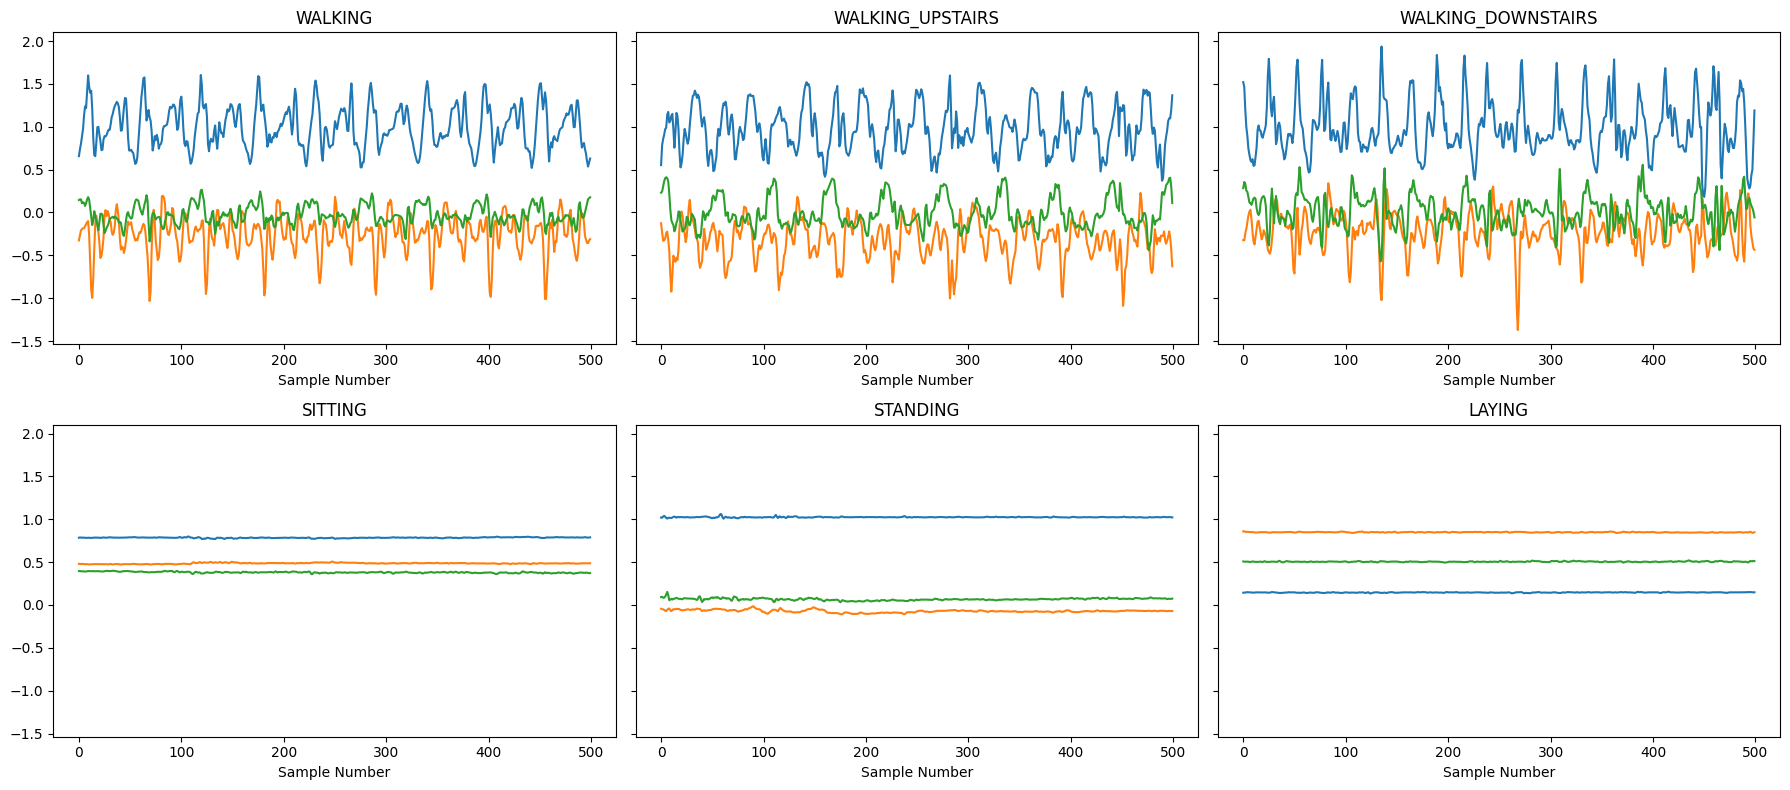

In [4]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey = True)

axes = axes.flatten()

for i, (activity, data) in enumerate(raw_acc.items()):
    axes[i].plot(data)
    axes[i].set_title(activity)
    axes[i].set_xlabel('Sample Number')
    
plt.tight_layout()
plt.show()

# Q2

### Linear acceleration for each activity

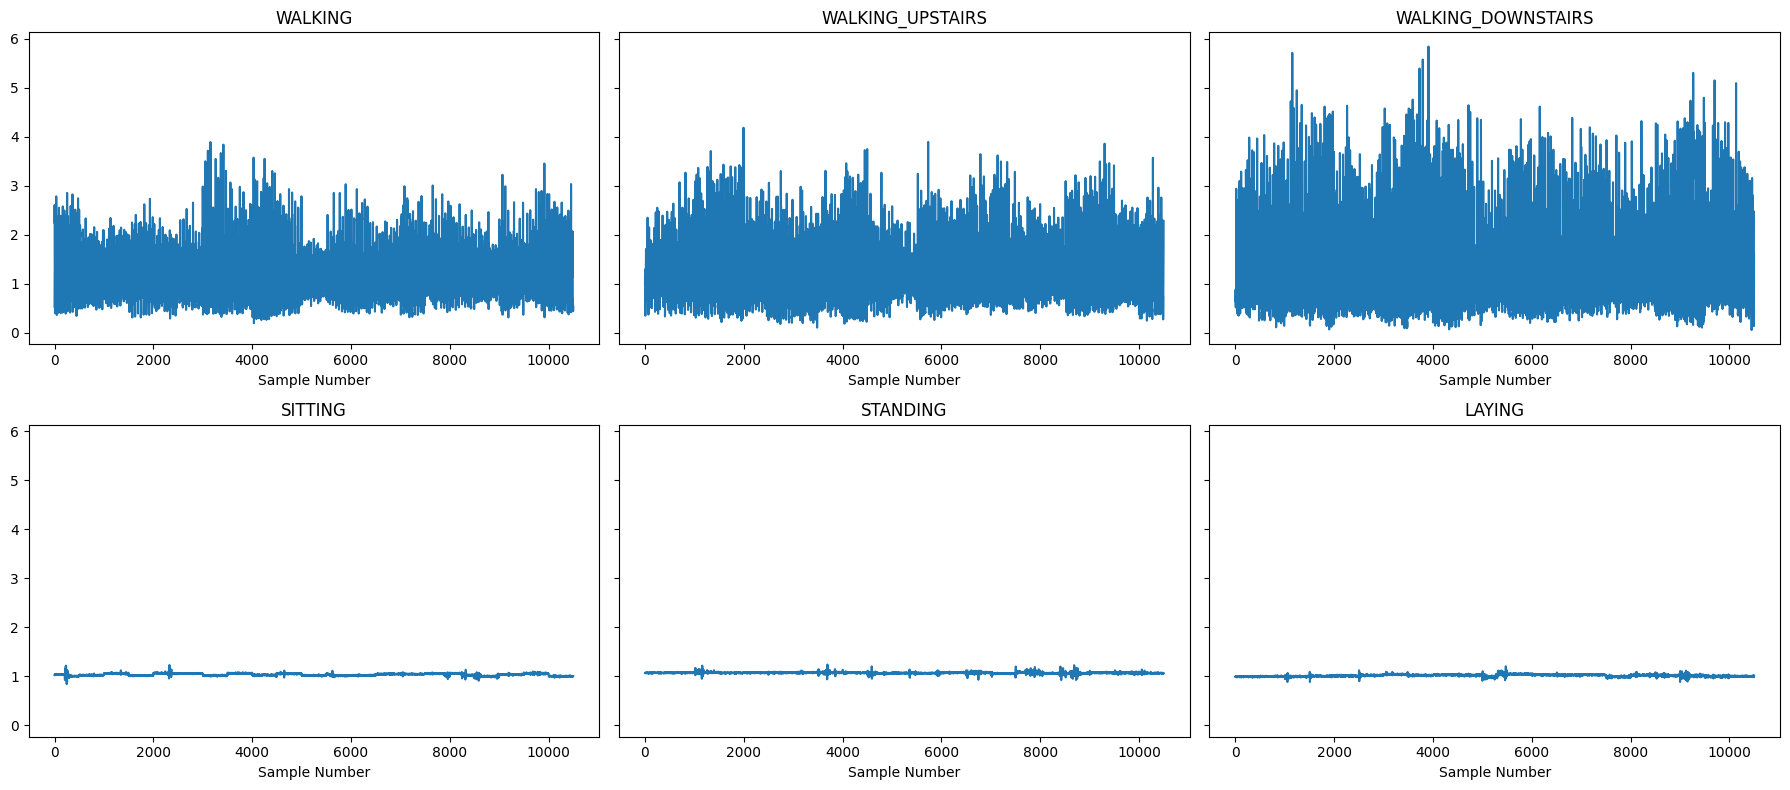

In [5]:
for activity in activities:
    linear_acc[activity] = np.concatenate(linear_acc[activity])

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey = True)

axes = axes.flatten()

for i, (activity, data) in enumerate(linear_acc.items()):
    axes[i].plot(data)
    axes[i].set_title(activity)
    axes[i].set_xlabel('Sample Number')
    
plt.tight_layout()
plt.show()

#### The plots of linear acceleration clearly illustrate a significant distinction between static and dynamic activities. Given this evident difference, a simple rule-based classifier could be sufficient, as the separation between dynamic and static activities is well-defined in the plots.

# Q3

### 3.1) PCA on total acceleration for first 500 samples

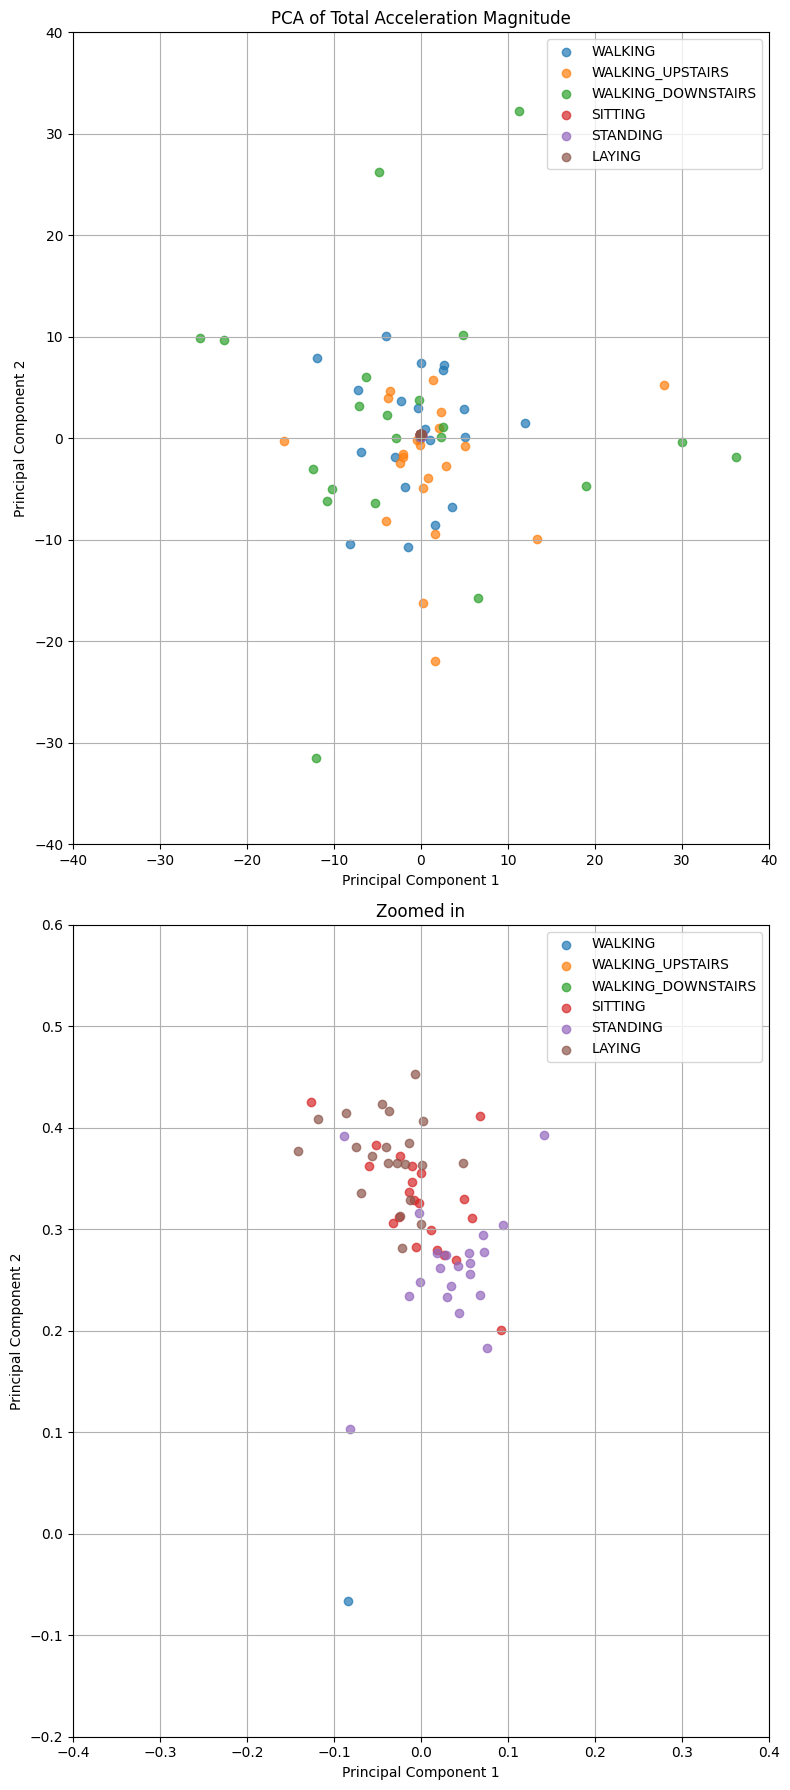

In [6]:
# Convert lists to numpy arrays
all_data = np.array([data for data in all_data])
all_labels = np.array(all_labels)

# Standardize data
scaler = StandardScaler()
all_data_standardized = scaler.fit_transform(all_data)

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(all_data_standardized)

# Create a DataFrame for easy plotting
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df['Activity'] = all_labels
    
# plt.xlim(-40, 40)
# plt.ylim(-40, 40)

# plt.xlim(-0.7, 0.7)
# plt.ylim(-0.7, 0.7)

# plt.title('PCA of Total Acceleration Magnitude')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.grid(True)
# plt.show()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 18))

axes[0].set_xlim(-40, 40)
axes[0].set_ylim(-40, 40)
axes[0].set_title('PCA of Total Acceleration Magnitude')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

for activity in activities:
    subset = pca_df[pca_df['Activity'] == activity]
    axes[0].scatter(subset['PC1'], subset['PC2'], label=activity, alpha=0.7)

axes[0].legend()
axes[0].grid(True)

# Plot to focus on the static activities which are clustered
axes[1].set_xlim(-0.4, 0.4)
axes[1].set_ylim(-0.2, 0.6)
axes[1].set_title('Zoomed in')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

for activity in activities:
    subset = pca_df[pca_df['Activity'] == activity]
    axes[1].scatter(subset['PC1'], subset['PC2'], label=activity, alpha=0.7)

axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [7]:
!pip install tsfel

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.3 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.3 MB ? eta -:--:--
   ------- -------------------------------- 0.8/4.3 MB 1.5 MB/s eta 0:00:03
   -------------- ------------------------- 1.6/4.3 MB 2.3 MB/s eta 0:00:02
   --------------------------- ------------ 2.9/4.3 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 4.3/4.3 MB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------------- ------------------------- 3.7/9.8 MB 16.8 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.8 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 16.2 MB/s eta 0:00:00


In [8]:
import tsfel

cfg_file = tsfel.get_features_by_domain()

df_X = tsfel.time_series_features_extractor(cfg_file, X_df.loc[0], fs=50, verbose=0)

for ind in range(1, 180):
  temp = tsfel.time_series_features_extractor(cfg_file, X_df.loc[ind], fs=50, verbose=0)
  df_X = pd.concat([df_X, temp]).reset_index(drop=True)

df_X


NameError: name 'X_df' is not defined

In [ ]:
import tsfel
import pandas as pd

df = pd.DataFrame({activity: data for activity, data in activity_samples.items()})

# Retrieves a pre-defined feature configuration file to extract all available features
cfg = tsfel.get_features_by_domain()

# Extract features
X = tsfel.time_series_features_extractor(cfg, df)

print(X.head())

ImportError: cannot import name 'Literal' from 'typing' (C:\Users\hrish\AppData\Local\Programs\Python\Python37\lib\typing.py)

### 3.3) PCA using the features given in the dataset

         PC1       PC2  Activity
0 -16.138544  2.152026         5
1 -15.296194  1.387144         5
2 -15.137019  2.473351         5
3 -15.350884  3.915681         5
4 -15.544814  4.598737         5


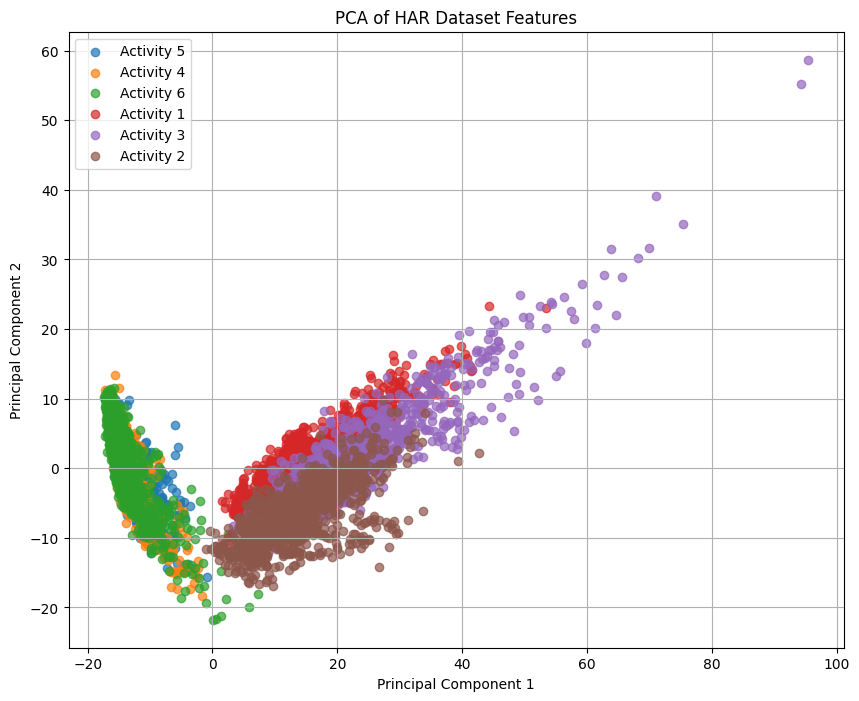

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Paths to your files
x_train_path = "./HAR/UCI HAR Dataset/train/X_train.txt"
y_train_path = "./HAR/UCI HAR Dataset/train/y_train.txt"
features_path = "./HAR/UCI HAR Dataset/features.txt"
# Step 1: Load the feature names
with open(features_path, "r") as f:
    feature_names = [line.strip().split()[1] for line in f.readlines()]  # Assuming feature names are in the 2nd column

# Step 2: Load the features and activity labels
with open(x_train_path, "r") as x_file:
    x_content = x_file.readlines()

with open(y_train_path, "r") as y_file:
    y_content = y_file.readlines()

# Initialize lists to store data
data_with_labels = []

for x_line, y_line in zip(x_content, y_content):
    features = [float(value) for value in x_line.split()]
    activity_label = int(y_line.strip())
    data_with_labels.append(features + [activity_label])  # Combine features and label

# Convert to a DataFrame
df = pd.DataFrame(data_with_labels, columns=feature_names + ['Activity'])

# Step 3: Apply PCA
# Separate features and labels
X = df.drop(columns=['Activity'])
y = df['Activity']

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Convert PCA results into a DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Activity'] = y.values

# Print the first few rows of the PCA DataFrame
print(pca_df.head())

# Step 4: Visualize the PCA results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for activity in pca_df['Activity'].unique():
    subset = pca_df[pca_df['Activity'] == activity]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Activity {activity}', alpha=0.7)

plt.title('PCA of HAR Dataset Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


# Q4

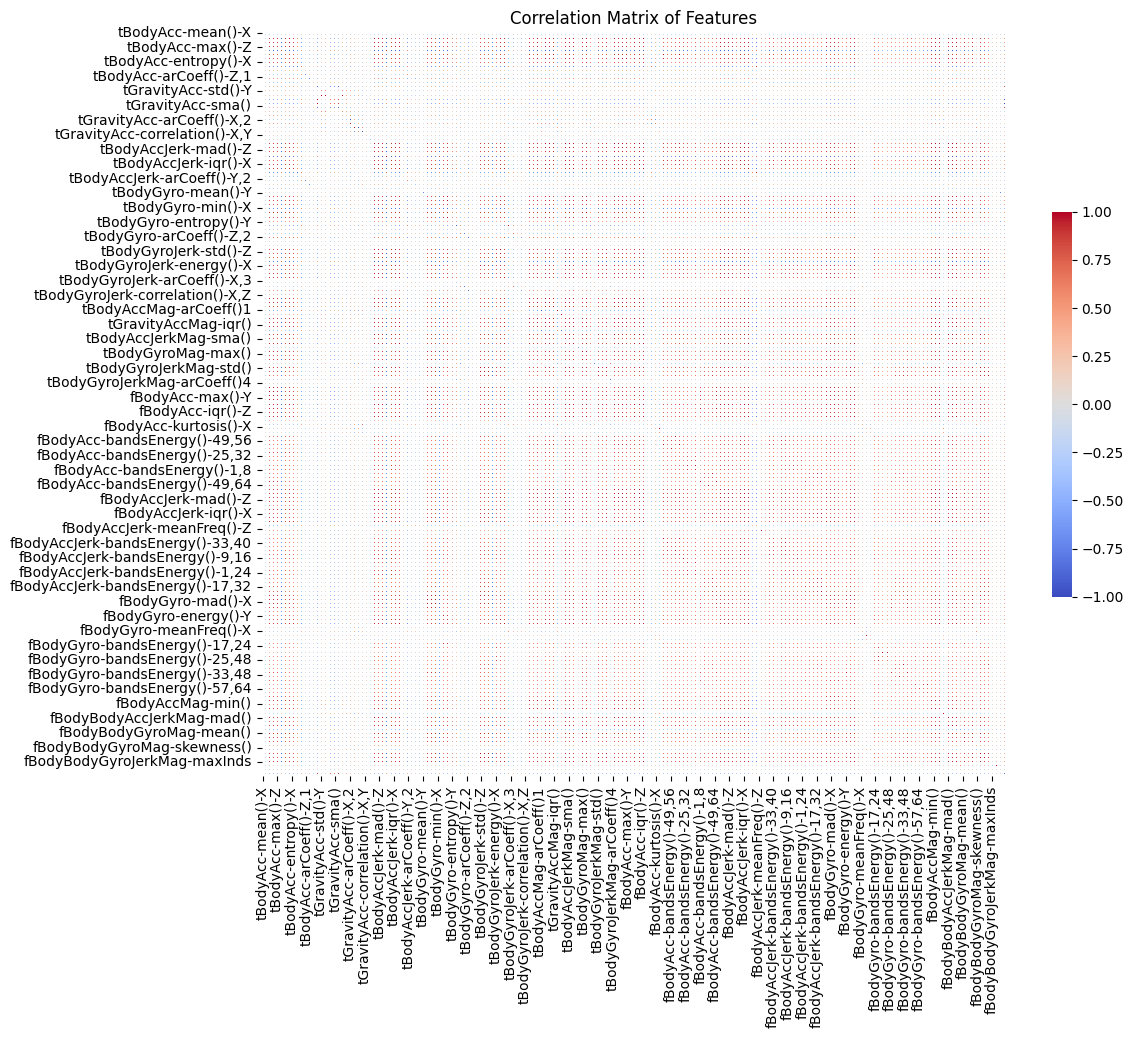

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Paths to your files
x_train_path = "./HAR/UCI HAR Dataset/train/X_train.txt"
y_train_path = "./HAR/UCI HAR Dataset/train/y_train.txt"
features_path = "./HAR/UCI HAR Dataset/features.txt"

# Step 1: Load the feature names
with open(features_path, "r") as f:
    feature_names = [line.strip().split()[1] for line in f.readlines()]

# Step 2: Load the features and activity labels
with open(x_train_path, "r") as x_file:
    x_content = x_file.readlines()

with open(y_train_path, "r") as y_file:
    y_content = y_file.readlines()

# Initialize lists to store data
data_with_labels = []

for x_line, y_line in zip(x_content, y_content):
    features = [float(value) for value in x_line.split()]
    activity_label = int(y_line.strip())
    data_with_labels.append(features + [activity_label])

# Convert to a DataFrame
df = pd.DataFrame(data_with_labels, columns=feature_names + ['Activity'])

# Step 3: Compute the correlation matrix
correlation_matrix = df.iloc[:, :-1].corr()  # Exclude the 'Activity' column

# Step 4: Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Features')
plt.show()


# Task 2

## Q1

In [ ]:
pip install seaborn


   ---------------------------------------- 293.3/293.3 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
train_path = "./HAR/Combined/Train"
test_path = "./HAR/Combined/Test"

Accuracy: 0.5628
Precision: 0.5954
Recall: 0.5628

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00     34368
           SITTING       0.77      0.62      0.69     31424
          STANDING       0.69      0.49      0.57     34048
           WALKING       0.33      0.41      0.36     31744
WALKING_DOWNSTAIRS       0.35      0.41      0.38     26880
  WALKING_UPSTAIRS       0.35      0.39      0.37     30144

          accuracy                           0.56    188608
         macro avg       0.58      0.55      0.56    188608
      weighted avg       0.60      0.56      0.57    188608



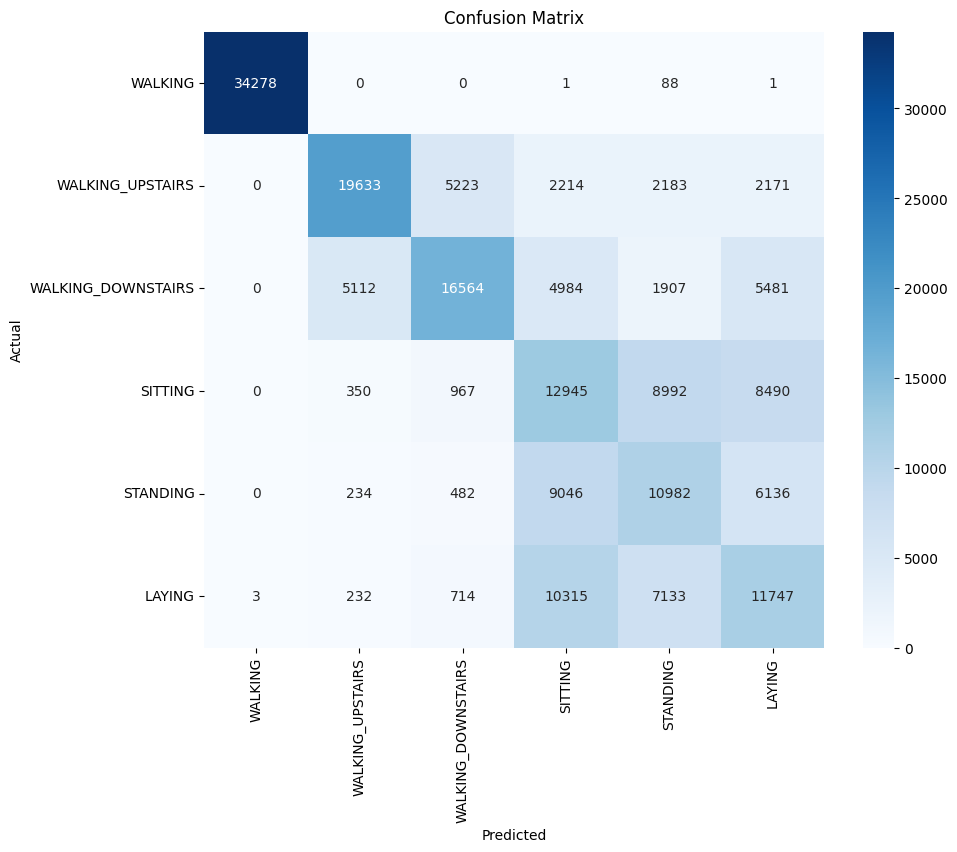

In [10]:

import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


activities = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

# Function to load data from a given path
def load_data(path):
    all_data = []
    all_labels = []
    
    for activity in activities:
        activity_path = os.path.join(path, activity)
        
        subjects = [f for f in os.listdir(activity_path) if f.endswith('.csv')]
        
        for subject in subjects:
            file_path = os.path.join(activity_path, subject)
            df = pd.read_csv(file_path)
            
            x = df['accx']
            y = df['accy']
            z = df['accz']
            
            features = np.vstack((x, y, z)).T
            all_data.append(features)
            all_labels.extend([activity] * len(x))  # Duplicate the label for each sample
            
    all_data = np.concatenate(all_data, axis=0)
    all_labels = np.array(all_labels)
    
    return all_data, all_labels

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=activities, yticklabels=activities)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Varying depths
depths = range(2, 9)
accuracies = []

for depth in depths:
    dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=depth)
    X_train_flatten = X_train.reshape((X_train.shape[0], -1))
    dt_classifier.fit(X_train_flatten, y_train)
    X_test_flatten = X_test.reshape((X_test.shape[0], -1))

    y_test_pred = dt_classifier.predict(X_test_flatten)

    accuracy = accuracy_score(y_test, y_test_pred)
    accuracies.append(accuracy)


# Plot the accuracies
plt.plot(depths, accuracies, marker='o')
plt.title('Decision Tree Accuracy vs Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.show()


## Q2

Depth: 2, Test Accuracy: 0.4613
Depth: 3, Test Accuracy: 0.5332
Depth: 4, Test Accuracy: 0.6030
Depth: 5, Test Accuracy: 0.6270
Depth: 6, Test Accuracy: 0.6323
Depth: 7, Test Accuracy: 0.6374
Depth: 8, Test Accuracy: 0.6364


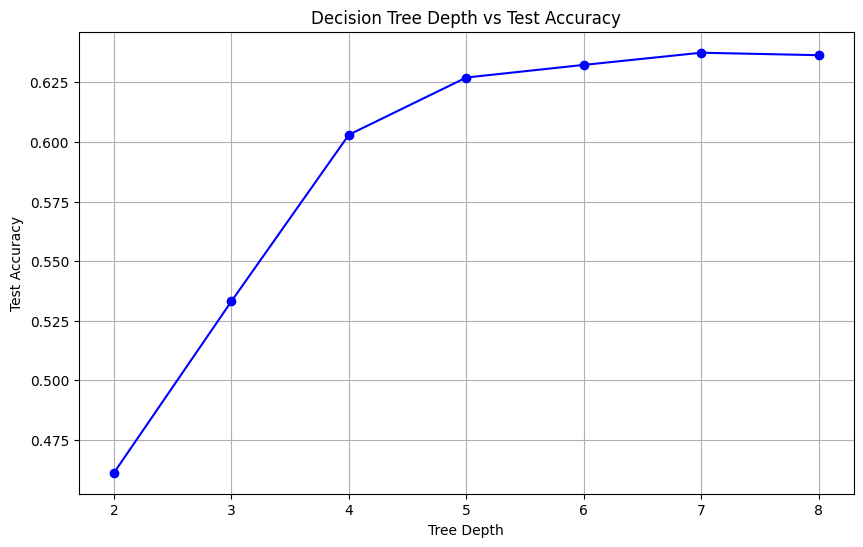

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Function to load data from a given path
def load_data(path):
    all_data = []
    all_labels = []
    
    for activity in activities:
        activity_path = os.path.join(path, activity)
        
        subjects = [f for f in os.listdir(activity_path) if f.endswith('.csv')]
        
        for subject in subjects:
            file_path = os.path.join(activity_path, subject)
            df = pd.read_csv(file_path)
            
            x = df['accx']
            y = df['accy']
            z = df['accz']
            
            features = np.vstack((x, y, z)).T
            all_data.append(features)
            all_labels.extend([activity] * len(x))  # Duplicate the label for each sample
            
    all_data = np.concatenate(all_data, axis=0)
    all_labels = np.array(all_labels)
    
    return all_data, all_labels

# Load training and test data
X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

# Initialize lists to store depths and corresponding accuracies
depths = range(2, 9)  # Tree depths from 2 to 8
test_accuracies = []

# Train Decision Tree with varying depths
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)
    
    print(f"Depth: {depth}, Test Accuracy: {accuracy:.4f}")

# Plot accuracy vs depth
plt.figure(figsize=(10, 6))
plt.plot(depths, test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Depth vs Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()


# Task 4 - Data Collection In The Wild
Q1.

In [25]:

import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

path="./HAR Recorded Data/processed"

# Function to load data from a given path (modified little from the original function to suit the current needs)
def load_data(path):
    all_data = []
    all_labels = []
    
    activities = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

    for activity in activities:
        activity_path = os.path.join(path, activity)
        
        subjects = [f for f in os.listdir(activity_path) if f.endswith('.csv')]
        
        for subject in subjects:
            file_path = os.path.join(activity_path, subject)
            df = pd.read_csv(file_path)
            
            x = df['ax']
            y = df['ay']
            z = df['az']
            
            features = np.vstack((x, y, z)).T
            all_data.append(features)
            all_labels.extend([activity] * len(x))  # Duplicate the label for each sample
            
    all_data = np.concatenate(all_data, axis=0)
    all_labels = np.array(all_labels)
    
    return all_data, all_labels

X_test, y_test = load_data(path)

In [26]:
y_hat = model.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat, average='weighted')
recall = recall_score(y_test, y_hat, average='weighted')
conf_matrix = confusion_matrix(y_test, y_hat)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_hat))

Accuracy: 0.2476
Precision: 0.1643
Recall: 0.2476

Classification Report:
                     precision    recall  f1-score   support

            LAYING       0.27      0.99      0.43      2000
           SITTING       0.00      0.00      0.00      2000
          STANDING       0.00      0.00      0.00      2000
           WALKING       0.32      0.06      0.11      2000
WALKING_DOWNSTAIRS       0.23      0.32      0.26      2000
  WALKING_UPSTAIRS       0.17      0.11      0.14      2000

          accuracy                           0.25     12000
         macro avg       0.16      0.25      0.16     12000
      weighted avg       0.16      0.25      0.16     12000



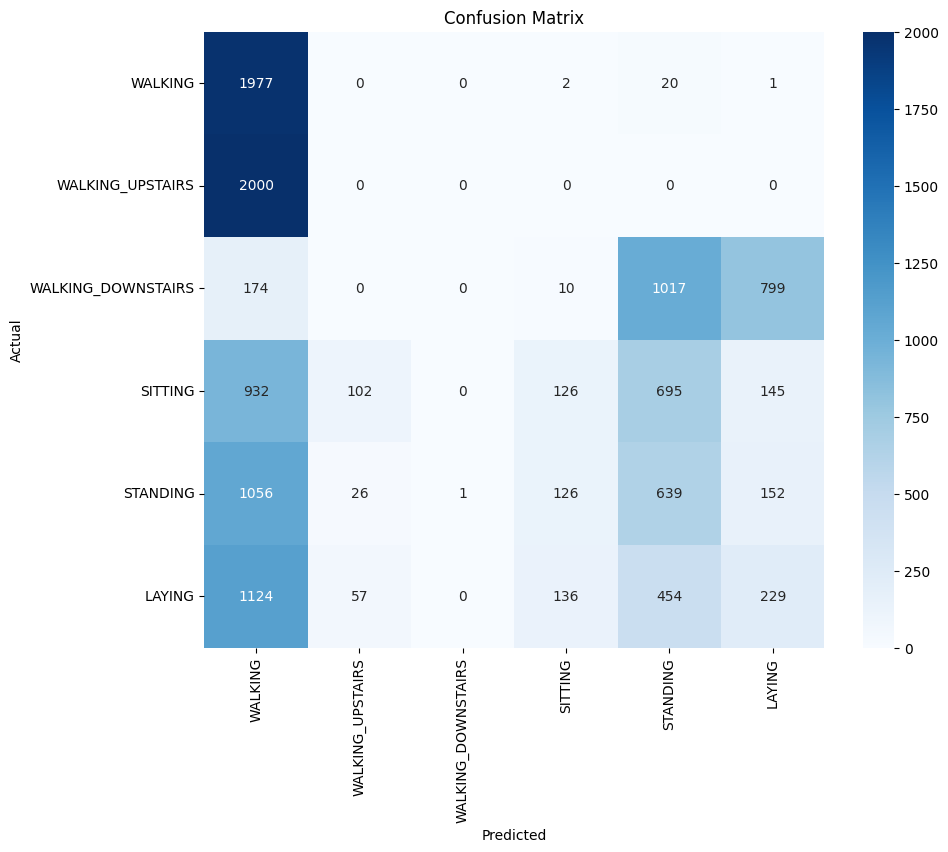

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=activities, yticklabels=activities)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We chose to work with the raw data of the HAR dataset as thats what most closly resemmbled our data as well.
The model on the original train and test set (of raw data) had the following metrics:
- Accuracy: 0.5628
- Precision: 0.5954
- Recall: 0.5628

When we ran the same model on our recorded raw data, the following were its metrics:
- Accuracy: 0.2476
- Precision: 0.1643
- Recall: 0.2476

The model clearly has a poor performance on our recorded data.



Q2.

In [50]:
from sklearn.preprocessing import StandardScaler

# Function to load data from a given path as a dataframe (modified little from the original function to suit the current needs)
def load_data_as_df(path):
    all_data = []
    all_labels = []
    
    activities = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

    for activity in activities:
        activity_path = os.path.join(path, activity)
        
        subjects = [f for f in os.listdir(activity_path) if f.endswith('.csv')]
        
        for subject in subjects:
            file_path = os.path.join(activity_path, subject)
            df = pd.read_csv(file_path)

            x = df['ax']
            y = df['ay']
            z = df['az']
            
            features = np.vstack((x, y, z)).T
            all_data.append(features)
            all_labels.extend([activity] * len(x))  # Duplicate the label for each sample
            
    all_data = np.concatenate(all_data, axis=0)
    all_labels = np.array(all_labels)
    
    return all_data, all_labels

X, y = load_data(path)

In [54]:
print(X.shape,y.shape)

(12000, 3) (12000,)


In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [56]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7747
Precision: 0.7746
Recall: 0.7747

Classification Report:
                     precision    recall  f1-score   support

            LAYING       0.98      0.99      0.98       636
           SITTING       0.99      1.00      1.00       587
          STANDING       0.98      0.96      0.97       582
           WALKING       0.55      0.57      0.56       585
WALKING_DOWNSTAIRS       0.55      0.53      0.54       616
  WALKING_UPSTAIRS       0.59      0.59      0.59       594

          accuracy                           0.77      3600
         macro avg       0.77      0.77      0.77      3600
      weighted avg       0.77      0.77      0.77      3600



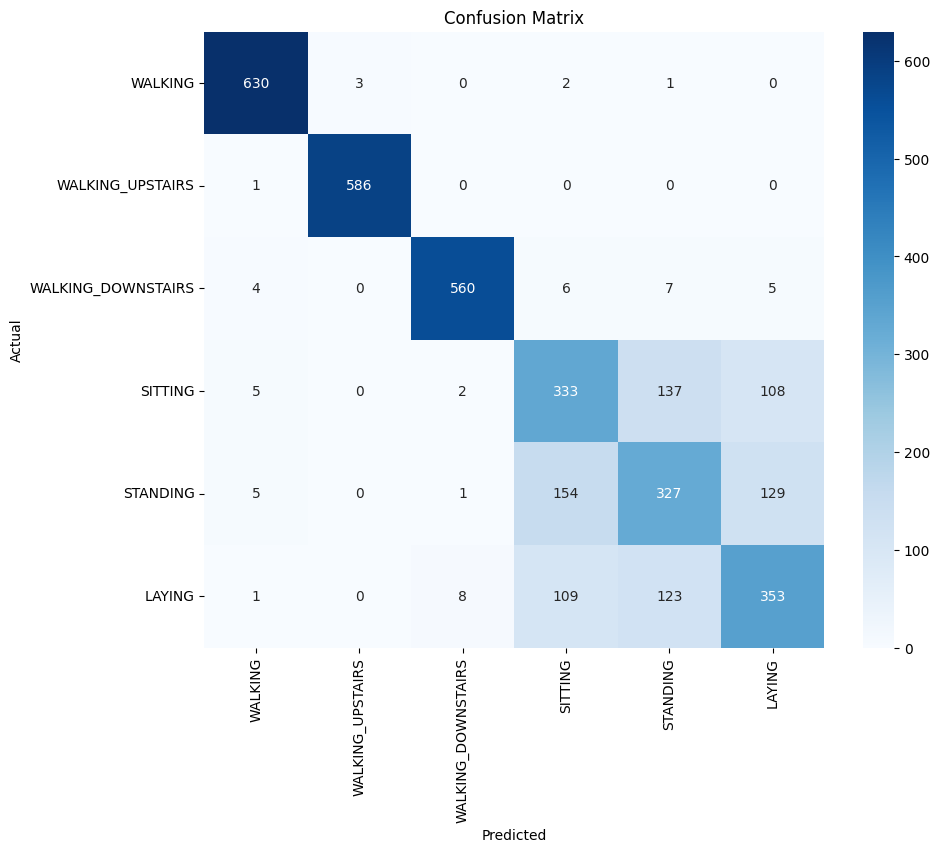

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=activities, yticklabels=activities)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model trained and tested on our recorded data works decently with:
- Accuracy: 0.7747
- Precision: 0.7746
- Recall: 0.7747